## РЕШАЮЩИЕ ДЕРЕВЬЯ ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ



In [21]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

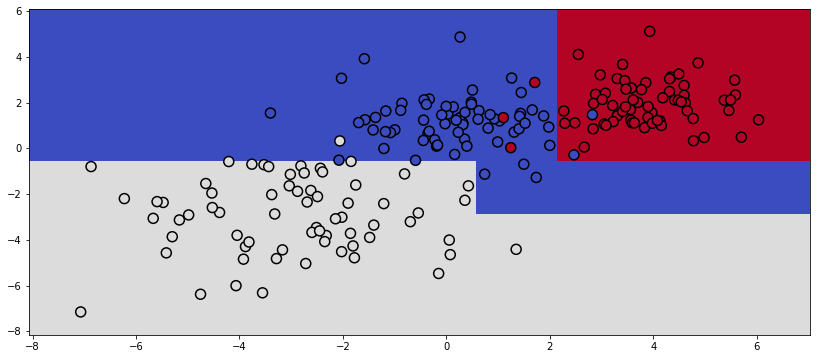

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(14,6))
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);


Вам предложен датасет с некоторыми характеристиками банкнот, по которым мы будем определять, является ли банкнота фальшивой или настоящей.

Параметры решающего дерева, которые понадобятся для решения задачи:

- max_depth — максимальная глубина дерева.
- max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве. Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
- min_samples_leaf — минимальное число объектов в листе. У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов.

In [3]:
data = pd.read_csv('./Unit_6_data/bill_authentication.csv')

In [4]:
X = data.drop(columns='Class')
y = data.Class

### Задание 5.2.3
Обучите на предложенных данных решающее дерево.   
Целевой переменной здесь является переменная Class.  
Размер тестовой выборки возьмите за 0.2, random_state = 17 для разбиения и дерева.   
Максимальную глубину дерева примите за 3 , максимальное число признаков, по которым ищется лучшее разбиение в дереве — за 2.  
Какое значение f1-score вы получили? Округлите до трёх знаков после точки-разделителя.

In [5]:
RANDOM_SEED = 17
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=RANDOM_SEED)
classifier = DecisionTreeClassifier(max_depth=3,max_features=2,random_state=RANDOM_SEED)

In [6]:
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
metrics =  f1_score(y_pred,y_test)
round(metrics,3)

0.866

### Задание 5.2.4
Проклассифицируйте банкноту с вектором признаков 2.04378,-0.38422,1.437292,0.76421. К какому классу она относится?

In [7]:
[[2.04378,-0.38422,1.437292,0.76421]]

[[2.04378, -0.38422, 1.437292, 0.76421]]

In [8]:
classifier.predict([[2.04378,-0.38422,1.437292,0.76421]])

array([0], dtype=int64)

Здесь приведена визуализация того, как одно решающее дерево разделяет выборку, состоящую из трёх классов.

Видно, что решающее дерево может очень неплохо отделить каждый класс от всех остальных. Разделяющая поверхность каждого класса кусочно-постоянная, и при этом каждая сторона поверхности параллельна оси координат, так как каждое условие сравнивает значение ровно одного признака с порогом.

В то же время решающее дерево вполне может переобучиться: его можно сделать настолько глубоким, что каждый лист решающего дерева будет соответствовать ровно одному объекту обучающей выборки. В этом случае, если записать в каждом листе ответ соответствующего объекта, на обучающей выборке получается нулевая ошибка. Дерево получается явно переобученным. Пример такого дерева:

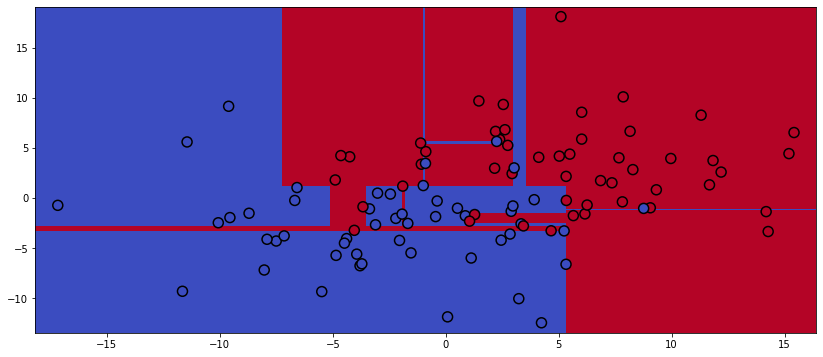

In [9]:
RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(14,6))
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

## РЕШАЮЩИЕ ДЕРЕВЬЯ В ЗАДАЧЕ РЕГРЕССИИ

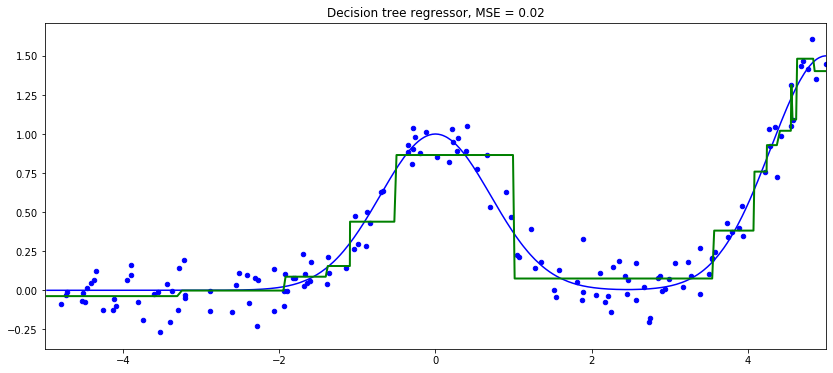

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(14, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.mean((y_test - reg_tree_pred) ** 2))
plt.show()

Потренируемся реализовывать задачу регрессии с помощью решающих деревьев на реальных данных. В данной задаче мы попробуем предсказать потребление топлива.

### Задание 5.2.5
Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за 0.3, random_state = 42 для разбиения и дерева.  
Вычислите RMSE, округлите до двух знаков после точки-разделителя.  
Какова глубина дерева?


In [14]:
df = pd.read_csv('./Unit_6_data/petrol_consumption.csv')

X = df.drop(columns='Petrol_Consumption')
y = df.Petrol_Consumption

regressor = DecisionTreeRegressor( random_state = 42)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

metrics = np.sqrt(mean_squared_error(y_pred,y_test))
round(metrics,2)

87.97

In [16]:
regressor.tree_.max_depth

11

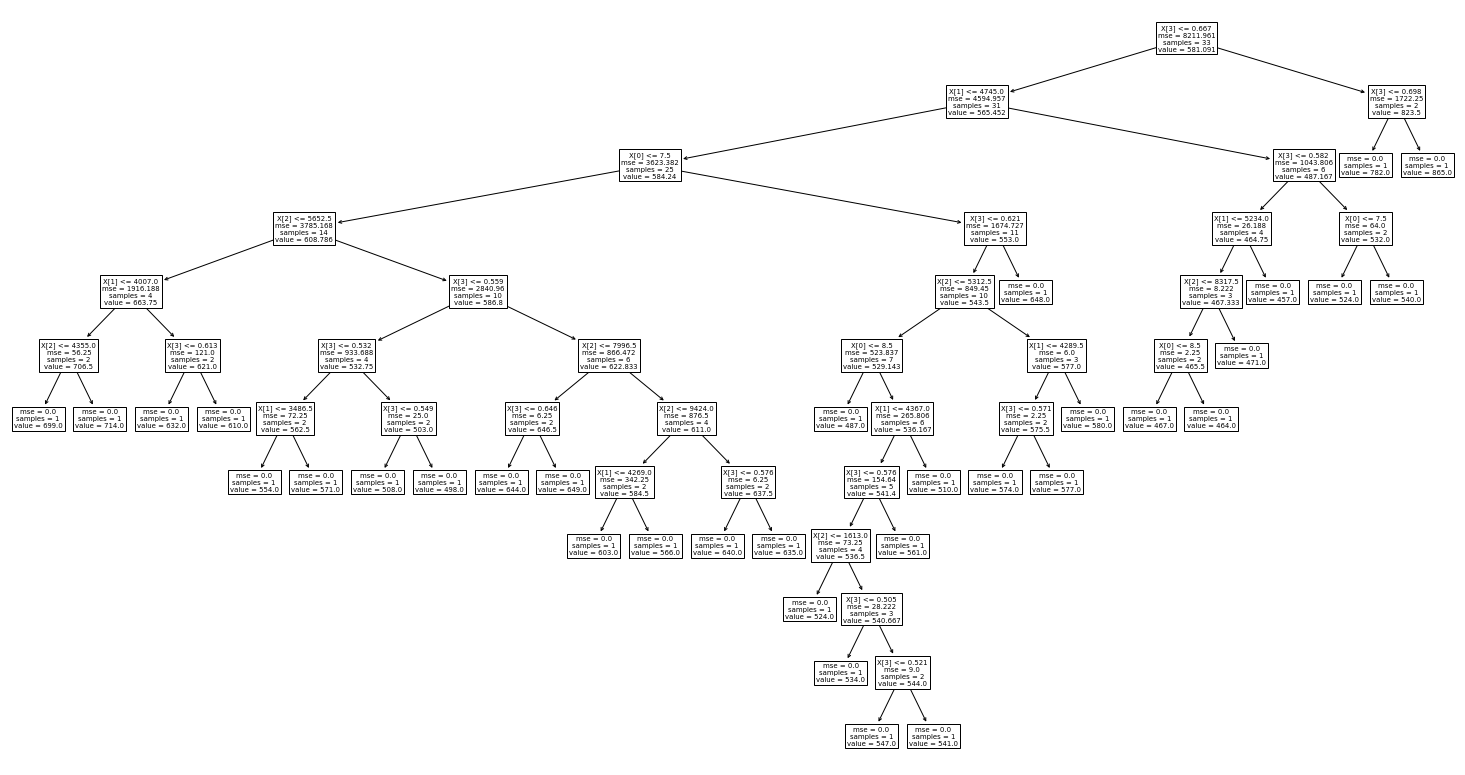

In [28]:
plt.figure(figsize=(26,14))
plot_tree(regressor);

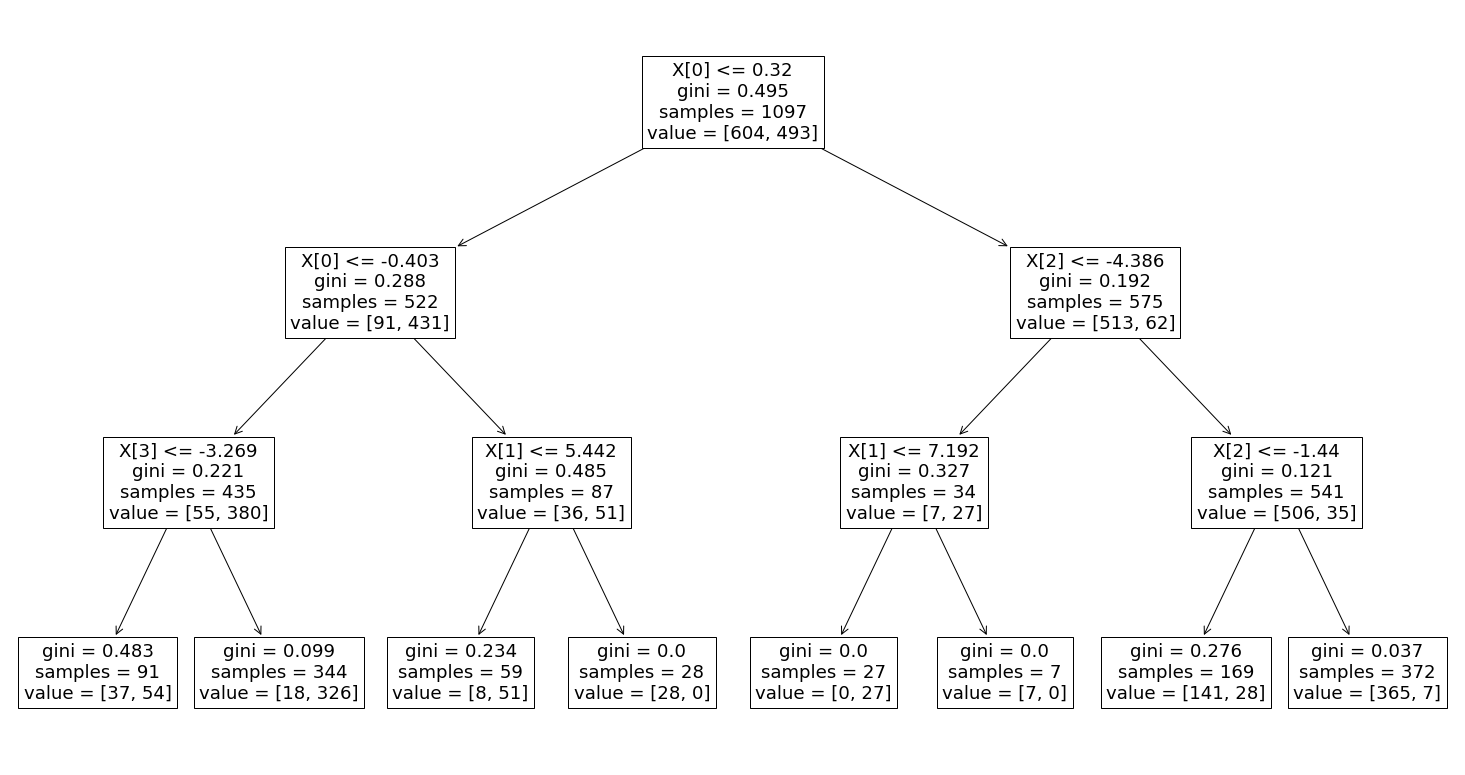

In [29]:
plt.figure(figsize=(26,14))
plot_tree(classifier);

### ЗАДАЧА О ВИНАХ
Реализуем бэггинг для деревьев решений. Для тренировки будем использовать датасет о винах. 

Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр quality которого не менее 6.

Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.

Разбейте выборку на обучающую и тренировочную с параметрами test_size=0.30, random_state=42.

Обучите два классификатора: логистическую регрессию (с дефолтными параметрами) и решающее дерево (random_state=42, максимальная глубина равна 10).

In [50]:
wine = pd.read_csv('./Unit_6_data/winequality-red.csv', sep=';')

X = wine.drop(columns='quality')
y = wine.quality

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Подвал

In [ ]:
with open('./Unit_6_data/winequality-red.csv') as wine:
    for line in wine:
        print(line.replace('"','').strip())